<a href="https://colab.research.google.com/github/lucasherrera-wq/Portafolio/blob/etapa-1/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install wbgapi

In [6]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CD para la Economía')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [8]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [9]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [10]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [11]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [12]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


##Etapa 1. Analsis descriptivo e imputacion de datos


#### Identificacion de valores nulos.

In [13]:
# Conteo de nulos.

nulos_conteo = df_wb_raw.isnull().sum()

# Porcentaje de nulos.

nulos_porcentaje = (df_wb_raw.isnull().sum() / len(df_wb_raw)) * 100

# Creamos un dataframe que contenga todos los datos nulos.

df_nulos = pd.DataFrame({
    'Total Nulos': nulos_conteo,
    'Porcentaje Nulos (%)': nulos_porcentaje.round(2)
})

# Por ultimo, filtramos solo las columnas que tienen al menos un valor nulo y lo ordenamos de forma descendiente.

df_nulos_resumen = df_nulos[df_nulos['Total Nulos'] > 0].sort_values(
    by='Porcentaje Nulos (%)', ascending=False
)

print("Resumen de Valores Nulos por Columna:")
df_nulos_resumen

Resumen de Valores Nulos por Columna:


,Total Nulos,Porcentaje Nulos (%)
SE.PRM.NENR.MA,198,100.00
SE.PRM.NENR.FE,198,100.00
SE.PRM.NENR,198,100.00
GC.TAX.EXPT.ZS,165,83.33
GC.TAX.EXPT.CN,165,83.33
GC.DOD.TOTL.CN,164,82.83
GC.DOD.TOTL.GD.ZS,164,82.83
IT.NET.USER.FE.ZS,141,71.21
IT.NET.USER.MA.ZS,141,71.21
EG.ELC.LOSS.ZS,128,64.65


Existen variables con un alto volumen de datos faltantes (NAN). Usaremos la siguiente regla para el tratamiento de los mismos:

- Si 'NaN' > 15% se procede a eliminar la variable.
- Si 'Nan' < 15% se procede a imputar datos.

In [14]:
umbral_nulos = 15

# 2. Identificar las columnas que superan el umbral.

# Usamos el índice de la tabla de resumen de nulos para obtener los nombres de las columnas.

cols_to_drop = df_nulos_resumen[df_nulos_resumen['Porcentaje Nulos (%)'] >= umbral_nulos].index.tolist()

# 3. Por último, eliminamos esas columnas del DataFrame original.

df_wb_limpio = df_wb_raw.drop(columns=cols_to_drop)

print(f"Columnas eliminadas por tener >= {umbral_nulos}% de nulos: {cols_to_drop}")
print(f"Nuevo número de columnas: {df_wb_limpio.shape[1]}")

Columnas eliminadas por tener >= 15% de nulos: ['SE.PRM.NENR.MA', 'SE.PRM.NENR.FE', 'SE.PRM.NENR', 'GC.TAX.EXPT.ZS', 'GC.TAX.EXPT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'IT.NET.USER.FE.ZS', 'IT.NET.USER.MA.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SE.TER.ENRR.MA', 'SE.TER.ENRR.FE', 'SE.TER.ENRR', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.FE', 'SE.SEC.ENRR', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.CON.GOVT.KN', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'NE.CON.GOVT.ZS']
Nuevo número de columnas: 41


In [15]:
# Verificamos si quedan nulos en la columna PIB.

nulos_pib = df_wb_limpio['NY.GDP.MKTP.PP.KD'].isnull().sum()
print(f"Valores nulos en la columna PIB: {nulos_pib}")

# Observamos el tipo de dato (que debe ser float o int).

tipo_dato = df_wb_limpio['NY.GDP.MKTP.PP.KD'].dtype
print(f"Tipo de dato de la columna PIB: {tipo_dato}")

# Mostramos los primeros 5 valores (para ver si son números).

print("Primeros 5 valores:")
print(df_wb_limpio['NY.GDP.MKTP.PP.KD'].head())

Valores nulos en la columna PIB: 0
Tipo de dato de la columna PIB: category
Primeros 5 valores:
0        Medium
1        Medium
2    Medium-Low
3          High
4           Low
Name: NY.GDP.MKTP.PP.KD, dtype: category
Categories (5, object): ['Low' < 'Medium-Low' < 'Medium' < 'Medium-High' < 'High']


In [16]:
# Renombramos la columna del PIB a PIB_Level para reflejar que es la variable objetivo categórica.

df_wb_limpio = df_wb_limpio.rename(columns={'NY.GDP.MKTP.PP.KD': 'PIB_Level'})

print("Columna renombrada.")

Columna renombrada.


In [17]:
# Identificamos las columnas numéricas (en la cual excluimos 'country', 'year', y la nueva 'PIB_Level')
# Y usamos .select_dtypes(include=np.number) para asegurar que solo tomamos números.

cols_numericas = df_wb_limpio.select_dtypes(include=np.number).columns.tolist()

# Imputamos por la mediana en cada columna numérica.

for col in cols_numericas:
    mediana = df_wb_limpio[col].median()
    df_wb_limpio[col].fillna(mediana, inplace=True)

# 3. Verificamos que no queden nulos en las columnas numéricas.

print("\nVerificación final de nulos en columnas numéricas:")
print(df_wb_limpio[cols_numericas].isnull().sum().sum())


Verificación final de nulos en columnas numéricas:
0


/tmp/ipython-input-987657428.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wb_limpio[col].fillna(mediana, inplace=True)


In [18]:
print("Información del DataFrame df_wb_limpio:")
df_wb_limpio.info()

Información del DataFrame df_wb_limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   PIB_Level                198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SL.TLF.TOTL.FE.ZS        198 non-null    float64 
 13  SL.TLF.TOTL.IN           

In [19]:
df_wb_limpio

,country,Country,PIB_Level,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,3.050000e+07,1.684321,0.96360,30.7,65.013,62.775,60.226,7.50,77.0,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.532150e+08,2.324653,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,3.159065e+06,0.580098,1.40855,91.5,71.502,65.170,59.691,84.15,97.6,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,-1.550000e+09,4.264071,50.18980,98.7,79.264,74.588,69.877,98.70,99.4,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,4.399200e+06,0.830619,0.00110,20.6,73.927,71.477,69.445,9.00,52.3,45.7313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AGO,Angola,Medium-High,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.335616e+07,-1.977864,1.79770,50.2,67.144,64.617,62.099,8.40,75.0,44.7581
194,AND,Andorra,Low,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.215940e+08,7.285975,1.40855,100.0,86.107,84.041,82.100,100.00,100.0,95.4456
195,DZA,Algeria,High,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,1.655830e+08,0.489819,16.38840,99.7,77.696,76.261,74.895,99.10,99.9,76.9081
196,ALB,Albania,Medium-Low,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,2.627767e+08,6.900370,0.81860,86.1,81.446,79.602,77.728,72.50,95.2,83.1356


In [20]:
# Lista de columnas a mantener sin cambios (categoricas)

cols_a_mantener = ['country', 'year', 'PIB_Level']

# Primero, creamos un diccionario de renombrado, para despues convertir el nombre
# en minúscula y reemplazar puntos por guinos bajo (o eliminando puntos),
# adicionalmente acortamos nombres muy larg

nuevos_nombres = {}

for col in df_wb_limpio.columns:
    if col not in cols_a_mantener:
        nuevo_nombre = col.lower()
        nuevo_nombre = nuevo_nombre.replace('.', '_')
        nuevos_nombres[col] = nuevo_nombre

# Por último, aplicamos el renombrado

df_wb_limpio = df_wb_limpio.rename(columns=nuevos_nombres)

print("Nombres de columnas limpiados. Primeras columnas:")
print(df_wb_limpio.columns[:5])

Nombres de columnas limpiados. Primeras columnas:
Index(['country', 'country', 'PIB_Level', 'sp_pop_grow', 'sp_pop_totl'], dtype='object')


#### Gráficos

#### 1. Distribución de paises por nivel de PIB categórico.

/tmp/ipython-input-3897368207.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


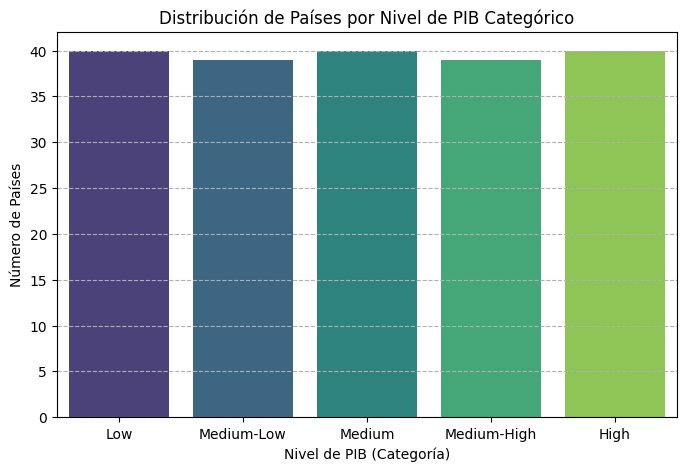

Distribución de Frecuencia de las Categorías de PIB:
PIB_Level
Low            40
Medium-Low     39
Medium         40
Medium-High    39
High           40
Name: count, dtype: int64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

conteo_pib = df_wb_limpio['PIB_Level'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=conteo_pib.index,
    y=conteo_pib.values,
    palette='viridis'
)
plt.title('Distribución de Países por Nivel de PIB Categórico')
plt.xlabel('Nivel de PIB (Categoría)')
plt.ylabel('Número de Países')
plt.grid(axis='y', linestyle='--')
plt.show()

print("Distribución de Frecuencia de las Categorías de PIB:")
print(conteo_pib)

In [22]:
print("Estadísticas Descriptivas del DataFrame Limpio:")
df_wb_limpio.describe().transpose()

# Acá utilizamos transpose() para una mejor visualización.

Estadísticas Descriptivas del DataFrame Limpio:


,count,mean,std,min,25%,50%,75%,max
sp_pop_grow,198.0,1.152752e+00,1.576210e+00,-8.423008e+00,2.828784e-01,1.112108e+00,2.088224e+00,6.527050e+00
sp_pop_totl,198.0,3.999611e+07,1.484957e+08,9.816000e+03,1.373786e+06,7.335048e+06,2.936413e+07,1.438070e+09
sp_pop_totl_fe_in,198.0,1.987776e+07,7.252840e+07,4.795000e+03,6.876850e+05,3.672054e+06,1.403224e+07,6.961863e+08
sp_pop_totl_fe_zs,198.0,4.997349e+01,2.993389e+00,2.848374e+01,4.965188e+01,5.032928e+01,5.118944e+01,5.492088e+01
sp_pop_totl_ma_in,198.0,2.011836e+07,7.598056e+07,5.021000e+03,6.826450e+05,3.560820e+06,1.424457e+07,7.418833e+08
sp_pop_totl_ma_zs,198.0,5.002651e+01,2.993389e+00,4.507912e+01,4.881056e+01,4.967072e+01,5.034812e+01,7.151626e+01
sp_urb_grow,198.0,1.729545e+00,1.826024e+00,-8.348151e+00,4.523152e-01,1.524572e+00,2.700316e+00,8.105580e+00
sp_urb_totl,198.0,2.289674e+07,8.019058e+07,6.283000e+03,8.540478e+05,4.463172e+06,1.624560e+07,9.244403e+08
sp_urb_totl_in_zs,198.0,6.220539e+01,2.272253e+01,1.505810e+01,4.336186e+01,6.362252e+01,7.954610e+01,1.000000e+02
sl_tlf_totl_fe_zs,198.0,4.230033e+01,8.493360e+00,6.846247e+00,4.097022e+01,4.508194e+01,4.735822e+01,5.467084e+01


#### 2. Distribución global del nivel de PIB (Clasificación)

In [23]:

import plotly.express as px
import pandas as pd

df_plot = df_wb_limpio.copy()

# Cambiamos el nombre de las columnas 'país' duplicadas para mayor claridad en el trazado.
# Asumimos que df_plot.columns[0] es un código ISO y df_plot.columns[1] es el nombre completo del país.

current_cols = list(df_plot.columns)
current_cols[0] = 'country_iso'
current_cols[1] = 'country_name'
df_plot.columns = current_cols

fig = px.choropleth(
    df_plot,
    locations='country_iso',
    locationmode='ISO-3',
    color='PIB_Level',
    hover_name='country_name',
    title='Distribución Global del Nivel de PIB (Clasificación)'
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar_title="Nivel de PIB"
)

